# Exercises  "Lecture 10: Clustering"

In this set of exercises, we will use clustering to group the wikipedia articles into 16 clusters. Since we are working on clustering (unsupervised machine learning),  we will ignore the labels (the category of the article) when training. We will use them however to evaluate the trained model (intrinsic evaluation).


The exercises cover the following points:

* Storing the data into an pandas dataframe and inspecting the data
* Learning a clustering model from the data 
* Inspecting the output clusters

Data: wkp_sorted.zip      

Python libraries
- sklearn.datasets to load data 
- pandas
- numpy unique method to remove duplicate   

Cheat sheets
- 10_CS_clustering.ipynb


##  Loading the Data into a Dataframe

**Exercise 1** 

* Create a pandas dataframe containing two columns one for the text and one for the category of each Wikipedia article included in  "data/wkp_sorted/". 
* Use sklearn.datasets load_files method (cf. **clustering CS**) 

In [24]:
import pandas as pd
from sklearn.datasets import load_files
DIR = "wkp_sorted/"

data = load_files(DIR, encoding="utf-8", decode_error="replace")
df = pd.DataFrame(list(zip(data["data"], data["target"])), columns = ["text", "label"])
df.head()
df.shape

(160, 2)

Expected output:

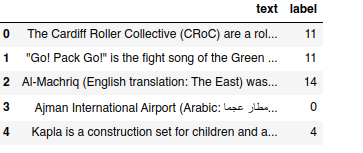

**Exercise 2**  

* Add a new column to your dataframe with header "Headers" in which you include the headers extracted from the texts
* Use the code you developed in Exercise 3 of 10_Exercise_sheet_stats.ipynb

In [25]:
import re
def get_headers(article:str)->list:
    pattern = re.compile("==(.*?)==")
    headers = re.findall(pattern, article)
    return [h.strip("=").strip(" ") for h in headers]


In [27]:
df["headers"] = df["text"].apply(get_headers)
df.head()

,text,label,headers
0,The Cardiff Roller Collective (CRoC) are a rol...,11,[References]
1,"""Go! Pack Go!"" is the fight song of the Green ...",11,"[Original lyrics, References, External links]"
2,Al-Machriq (English translation: The East) was...,14,"[Bibliography, References]"
3,Ajman International Airport (Arabic: مطار عجما...,0,"[Location, History, Operations, Facilities, Fl..."
4,Kapla is a construction set for children and a...,4,"[Name origin, History, Assembly, Varieties, Co..."


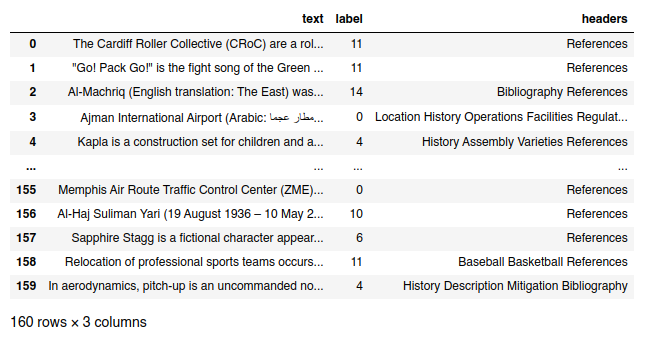

**Exercise 3** 

* How many articles are there ? Use the dataframe shape attribute which outputs the shape (nb of rows and columns) of a dataframe.

Expected answer: (160,2) 

In [28]:
df.shape

(160, 3)

**Exercise 4** 

* How many labels (categories) are there ?
* Use numpy unique method (cf. numpy CS)

Expected answer: 16

In [29]:
len(df["label"].unique())

16

**Exercise 5** 

* How many articles per category ?
* Use pandas 'groupby' and 'size' methods (cf. Pandas CS)

In [34]:
df.groupby("label").size()

label
0     10
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11    10
12    10
13    10
14    10
15    10
dtype: int64

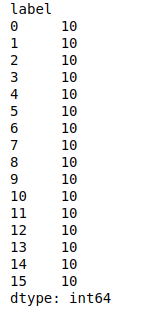

**Exercise 6** 

* Don't forget to shuffle the data (Cf. pandas CS)

In [35]:
from sklearn.utils import shuffle
df = shuffle(df)

## Vectorizing the input texts

$Y$ = the categories (Astronaut, etc.) we are aiming to rediscover. These are **not** used for clustering but they will be used for evaluation

$X$ = the features used for clustering. The features of Wikipedia article is the list of tokens contained in that item. We hope that words can help group the articles into 16 clusters matching the Wikipedia categories.


In [37]:
Y = df["label"]
X = df["text"]

**Exercise 7** 

* Vectorize the input (X)
* Use sklearn [TfidfVectorizer]( https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method to turn the Wikipedia articles into a TF-IDF matrix where each row represents a news item, the columns are tokens and the cell contains the tf-idf score of each token.

Three steps
* Import the TfidfVectorizer method from sklearn
* Create a tf-idf vectorizer. The maximum nb of features should be set to 500. Set use_idf to True and stop_words to "english".
* Apply the tfidf_vectorizer.fit_transform method to X to vectorize all input texts

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(max_features=500, stop_words="english")
matrix = vectorizer.fit_transform(X)

In [40]:
matrix

<160x500 sparse matrix of type '<class 'numpy.float64'>'
	with 9943 stored elements in Compressed Sparse Row format>

**Exercise 8** 

* Print out the features created by the vectorizer (use the get_feature_names() method).

Expected answer: a list of tokens

In [44]:
feats = vectorizer.get_feature_names_out(X)
print(len(feats), feats)

500 ['000' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '2000'
 '2001' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011'
 '2012' '2013' '2014' '2015' '2017' '2018' '2019' '21' '22' '24' '30'
 '500' 'according' 'act' 'activities' 'africa' 'african' 'age' 'air'
 'aircraft' 'airlines' 'airport' 'airports' 'airspace' 'ajman' 'al'
 'aldrin' 'america' 'american' 'anti' 'apollo' 'appeared' 'appears'
 'april' 'arab' 'arabic' 'area' 'areas' 'army' 'art' 'associated'
 'association' 'astronaut' 'atmospheric' 'attack' 'attacks' 'august'
 'authority' 'avengers' 'aviation' 'award' 'away' 'base' 'based' 'beacon'
 'began' 'believed' 'best' 'board' 'body' 'born' 'bread' 'britain'
 'british' 'building' 'built' 'burial' 'bus' 'business' 'california'
 'called' 'canada' 'cannonball' 'captain' 'career' 'caste' 'castes'
 'cement' 'cemetery' 'center' 'central' 'centre' 'century' 'certain'
 'channel' 'character' 'check' 'chief' 'children' 'china' 'chinese' 'city'
 'class' 'club' 'c

##  Training a K-means clustering model

**Exercise 9**

* Create a K-means object (import KMeans from sklearn.cluster). 
* Set the number of clusters to 16
* Train this object on the tf-idf matrix you created from the data (use the kmeans fit method)

In [46]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 16)
km.fit(matrix)

c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16)

## Inspecting Clustering Results

In [52]:
df["cluster"] = km.labels_

In [53]:
df

,text,label,headers,predicted_label,cluster
88,The Al Jazeera bombing memo is an unpublished ...,7,"[Details of the memo, Official secrets and UK ...",9,9
23,Katterbach Kaserne is a United States Army fac...,0,"[History, German use during World War II, USAA...",14,14
58,Airport check-in is the process whereby passen...,0,"[Types of check-in, Destination or Point Check...",6,6
121,NGC 5824 is a globular cluster in the constell...,3,"[References, External links]",4,4
7,Lori Lemaris is a fictional mermaid in DC Comi...,6,"[Fictional character biography, Silver Age, Mo...",12,12
...,...,...,...,...,...
157,Sapphire Stagg is a fictional character appear...,6,"[Fictional character biography, Birds of Prey,...",12,12
53,Al-Fazl ( Urdu الفضل) has been the most import...,15,"[History, Mission, International reach, Refere...",2,2
25,"The Crab Nebula (catalogue designations M1, NG...",3,"[Observational history, First identification, ...",4,4
47,Tracy Caldwell Dyson (born Tracy Ellen Caldwel...,2,"[Personal life, Academic career, NASA career, ...",1,1


**Exercise 10** 

* Create a dataframe aligning the clustering results with the news items and their category
* The dataframe should contains 3 columns with headers "Text", "Category" and "Cluster"
* Extract the texts and labels from the dataframe you created from the wikipedia files
* Extract the list of cluster labels produced for each input text by the clustering algorithm (km.labels_)
* Create the required dataframe using these information 

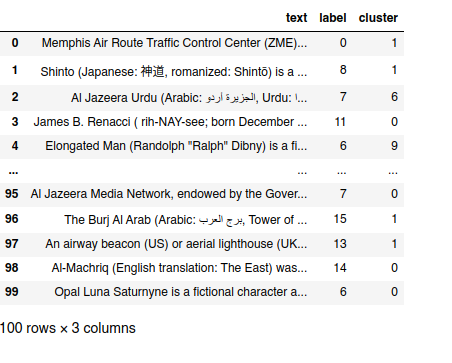

**Exercise 11** 

* Print out the number of items per clusters
* use pandas value_counts() method

In [56]:
df["cluster"].value_counts()

12    17
14    16
2     16
15    13
1     13
4     11
5     11
11    10
13     8
9      7
10     7
0      7
3      7
6      6
7      6
8      5
Name: cluster, dtype: int64

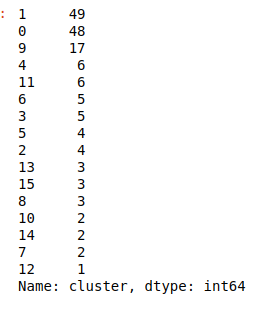

**Exercise 12** 

* Evaluate the clusters
* Import metrics from sklearns and compute homogeneity, completeness, v_measure, adjusted rand index and silhouette coefficient
* Print each score out

This should yield something like the following

Homogeneity: 0.207
Completeness: 0.283
V-measure: 0.239
Adjusted Rand-Index: -0.000
Silhouette Coefficient: 0.379


In [57]:
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score, adjusted_rand_score, silhouette_score

print("completeness_score", completeness_score(Y, km.labels_))
print("homogeneity_score", homogeneity_score(Y, km.labels_))
print("v_measure_score", v_measure_score(Y, km.labels_))
print("adjusted_rand_score", adjusted_rand_score(Y, km.labels_))
print("silhouette_score", silhouette_score(matrix, km.labels_))

completeness_score 0.6127028954924116
homogeneity_score 0.5966656742111002
v_measure_score 0.6045779514837204
adjusted_rand_score 0.3435876947662805
silhouette_score 0.07132156574122703


**Exercise 13**  

* Print out the top 50 words of each cluster 

Your output should be something like that:

Top terms per cluster:
Cluster 0: references television film notes achievements characterization liability legend historical airports people personal background winners podcasts railair publication properties programs courses exhibitions production filmography architecture miscellaneous advantages plot afl ribbons nrl retired preparation cast baseball basketball subaltern impact uses variations fleet badges vision runaways tenure trial gubernatorial elections conviction execution 52 animation portraits writing regenesis origin novels death hybrid locations memorialization australia athletics founders partnerships academics organization canada history career facilities access security operations cargo passengers regulation location bangladesh iraq antisemitism kuwait syria sudan tunisia libya somalia bahrain algeria malaysia egypt spain india israel categorization 2007 citations 2009 2011 chronology contributors

Cluster 1: references writing controversy doubles distance design description demographics definition death courses cosmogony conviction contributors blazon citations chronology characterization categorization cast cargo career canada brazil economy education egypt elections hybrid honors history historical gubernatorial geography gallery france founders fleet finland filmography film festivals features family facilities exhibitions execution etymology entertainment books biography impact bibliography aftermath afl advantages achievements access academics 52 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 airports algeria alternatives australia beliefs ba

In [61]:
# Print out the top 50 w²ords for each cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(16):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :50]:
        print(' %s' % terms[ind], end='')
    print("\n")

Cluster 0: african street art britain saturnyne known africa work born caste little influence castes london group life isbn captain project western army strata seen left slaves world early included style states community started live best man form time king death people age led earth american later international references created external links

Cluster 1: space university mission nasa astronaut flight air german medal force crew aldrin research flying shuttle july program engineering sea pilot school professor hours award service science training isbn built president second association board people california served years washington 13 born team education aircraft minutes order observed december russian state members

Cluster 2: al newspaper published arabic paper building hotel stohlman arab government important references history press based chief party leather official appears links 2011 external december series january following members organization international founded russian 

## Visualizing  clusters.

Provided


In [62]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array 

MDS()

# n_components=2 to plot results in a two-dimensional plane
# "precomputed" because the  distance matrix dist is already computed
# `random_state` set to 1 so that the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

c:\Users\bleuze3u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [63]:
#set up colors per clusters using a dict
# #1b9e77 (green) #d95f02 (orange) #7570b3 (purple) #e7298a (pink)
cluster_colors = {0: '#f0140c', 1: '#ad7144', 2: '#f5b92f', 3: '#e8f007', 4: '#88e014', \
                  5:"#0eedb2", 6:"#0dafdb", \
                  7:"#1330ed", 8:"#9a09e8", 9:"#e605b1", 10:"#c4a29d", 11:"#695232", 12:"#f7f088", 13:"#7e8778", \
                  14:"#7dada2", 15:"#628cf5"}

#set up cluster names using a dict
#cluster_names = {0: 'techno'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


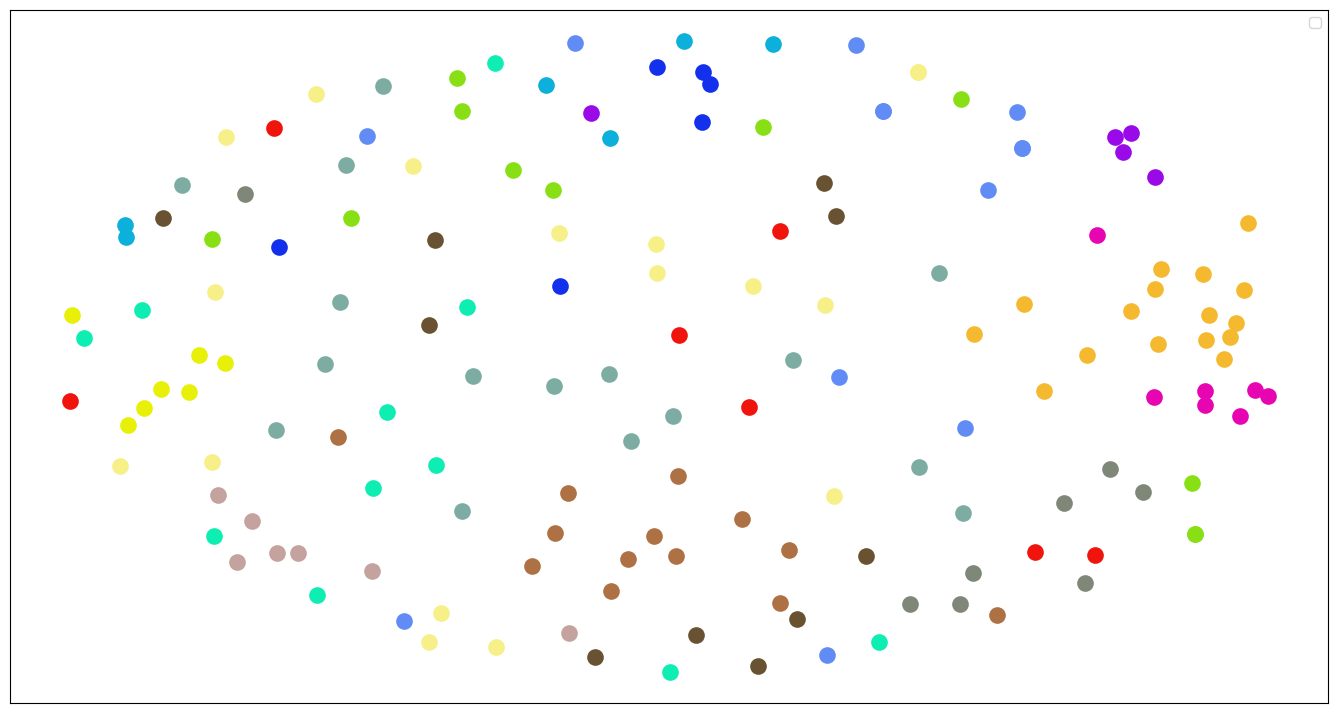

In [68]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label = km.labels_))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
        #    label=cluster_names[name], 
            color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)
    
ax.legend(numpoints=1)  #show legend with only 1 point
    
    
plt.show() #show the plot
